# Preparación de datos.
## Caracterización de variables

In [65]:
%load_ext autoreload
%autoreload 2

# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

# Partición de train-test set
from sklearn.model_selection import train_test_split

# Escalado de features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Pipelinessss
from sklearn.pipeline import Pipeline

# Libreria para ploteo
import seaborn as sns

#Import the metrics class
from sklearn import metrics
from sklearn.metrics import classification_report

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Datasets.

In [32]:
DATASET_PATH="./data"
!ls {DATASET_PATH}

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
df = pd.read_csv(DATASET_PATH+"/PS_20174392719_1491204439457_log.csv")

In [34]:
#Exploring the features availables in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [35]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


### Statiscal information about variables

In [36]:
df.describe().round()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0
mean,243.0,179862.0,833883.0,855114.0,1100702.0,1224996.0,0.0,0.0
std,142.0,603858.0,2888243.0,2924049.0,3399180.0,3674129.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,156.0,13390.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,239.0,74872.0,14208.0,0.0,132706.0,214661.0,0.0,0.0
75%,335.0,208721.0,107315.0,144258.0,943037.0,1111909.0,0.0,0.0
max,743.0,92445517.0,59585040.0,49585040.0,356015889.0,356179279.0,1.0,1.0


In [46]:
print('El porcentaje de casos de fraude es % \n', (df['isFraud'].value_counts()[1]/len(df)*100).round(4))

print(round(df.amount[df.isFraud ==0].describe()),2)

El porcentaje de casos de fraude es % 
 0.1291
count     6354407.0
mean       178197.0
std        596237.0
min             0.0
25%         13368.0
50%         74685.0
75%        208365.0
max      92445517.0
Name: amount, dtype: float64 2


In [47]:
print('El porcentaje de casos de NO fraude es % \n', (df['isFraud'].value_counts()[0]/len(df)*100).round(4))

print(round(df.amount[df.isFraud ==1].describe()),2)

El porcentaje de casos de NO fraude es % 
 99.8709
count        8213.0
mean      1467967.0
std       2404253.0
min             0.0
25%        127091.0
50%        441423.0
75%       1517771.0
max      10000000.0
Name: amount, dtype: float64 2


## Preparación de datos

Funcion de utilería para mostrar distribuciones.

In [40]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

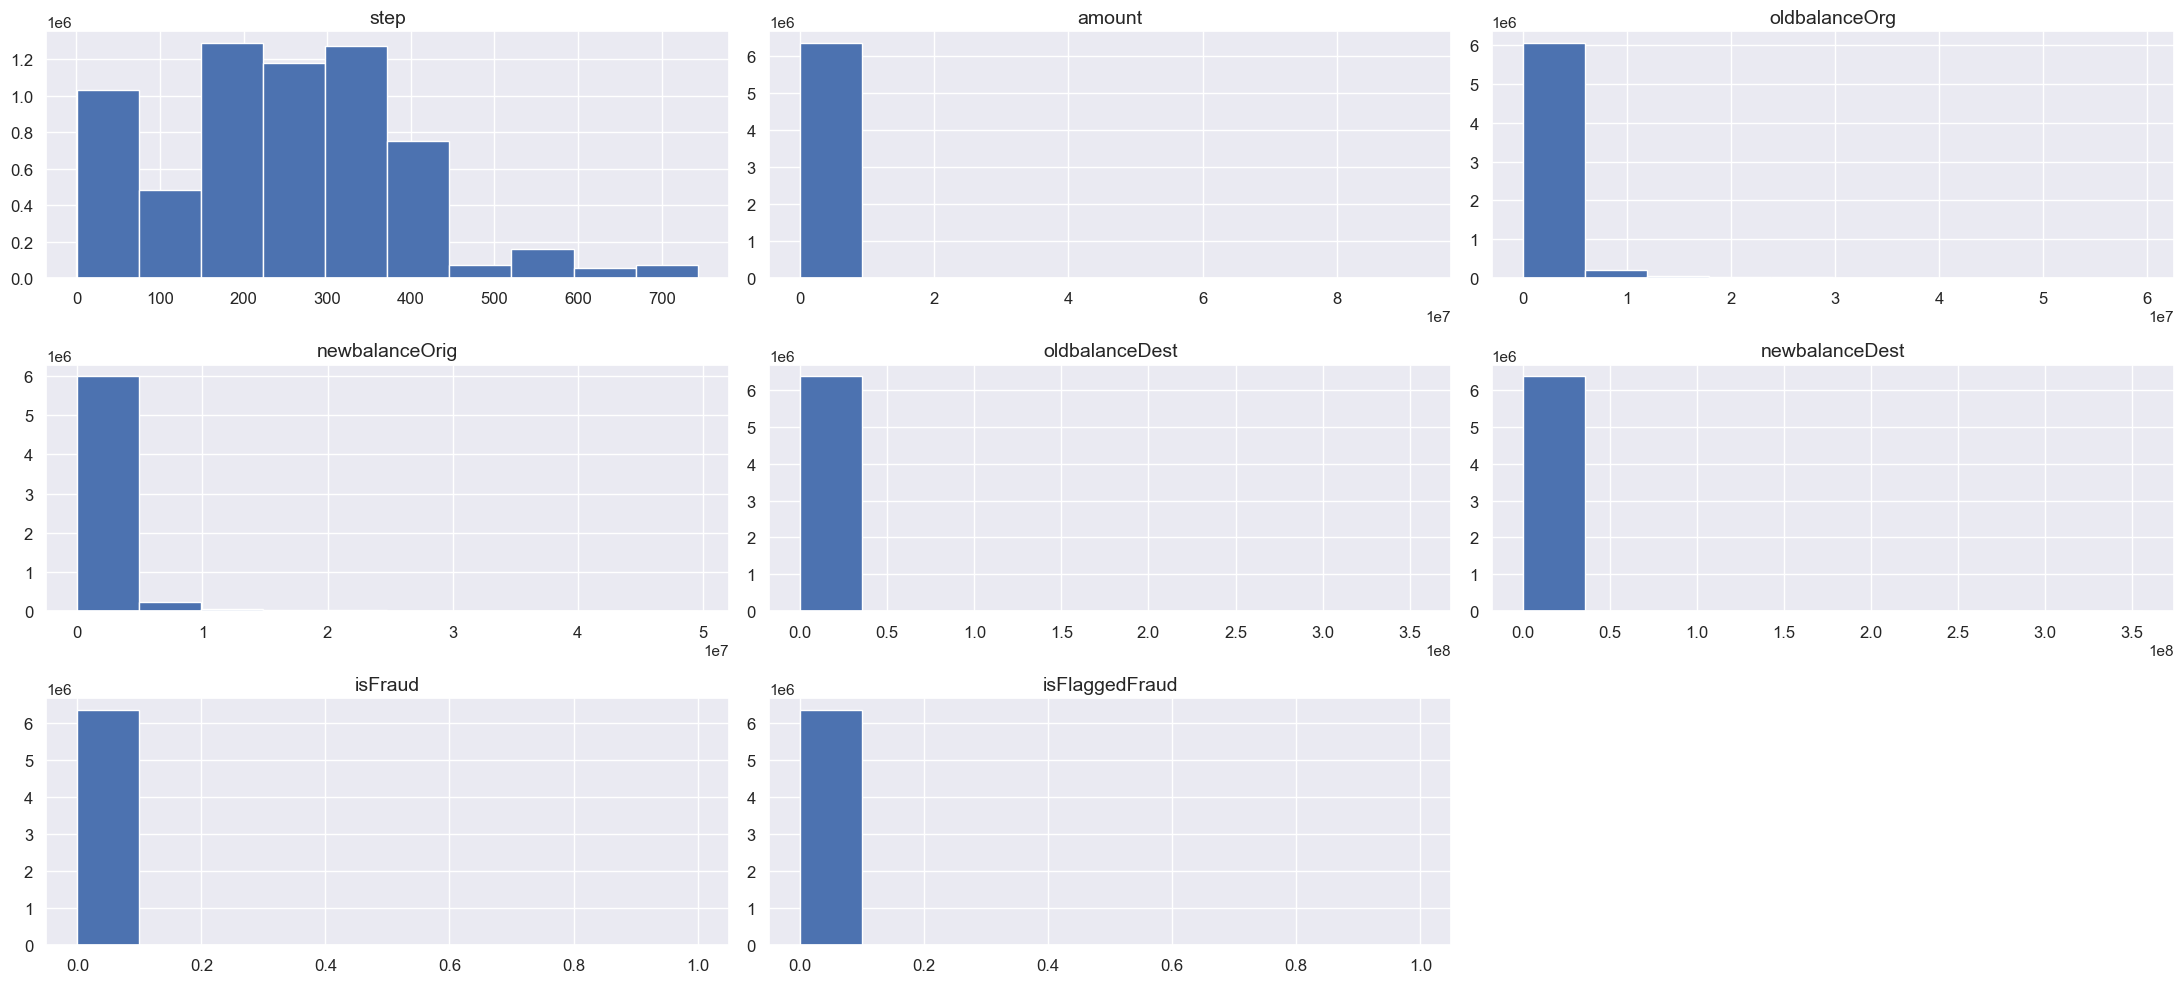

In [41]:
display_dataset_distributions(df)

## 2. Caracterización de variables

#### 2.1 Datos faltantes

Contar valores faltantes para cada variable (ejemplo con Titanic).

In [42]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Separación en train set y test set

In [53]:
use_cols = ['amount', 'oldbalanceOrg',	'newbalanceOrig','oldbalanceDest', 	'newbalanceDest']
X_train, X_test, y_train, y_test = train_test_split(
    df[use_cols], 
    df['isFraud'],  
    train_size=0.7,
    test_size=0.3,
    random_state=1)

X_train.shape, X_test.shape

((4453834, 5), (1908786, 5))

### Training the model

In [51]:
lregression = LogisticRegression()

In [52]:
lregression.fit(X_train, y_train)

LogisticRegression()

In [54]:
### Model predict
y_pred = lregression.predict(X_test)

### Metrics

In [58]:
cnf_matrix =  metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1902245,    4073],
       [    537,    1931]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted')

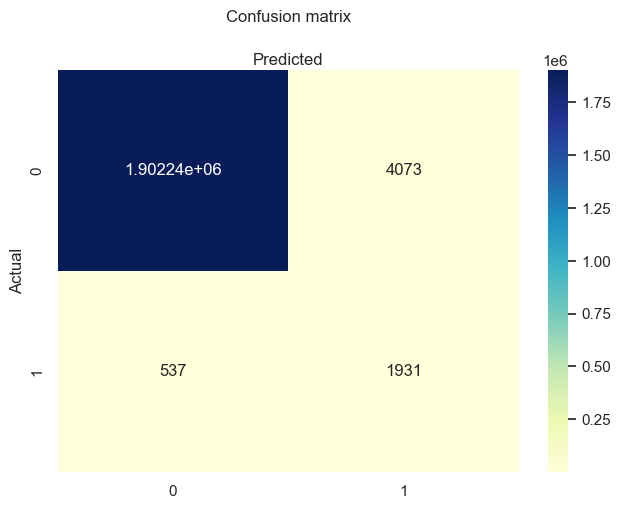

In [63]:
### Confusion matrix visualization with heatmap

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#Text(0.5, 257.44, 'Predicted')

### Evalauation metrics

In [68]:
target_names = ['No fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No fraud       1.00      1.00      1.00   1906318
       Fraud       0.32      0.78      0.46      2468

    accuracy                           1.00   1908786
   macro avg       0.66      0.89      0.73   1908786
weighted avg       1.00      1.00      1.00   1908786

